In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.utils import shuffle
from sklearn.preprocessing import Normalizer
import math
from plotDecBoundaries import plotDecBoundaries

In [ ]:
class preceptron:
    
    #defining all the variables
    def __init__(self,train_data,test_data,max_iterartion=10000,learning_rate=1, seed = 123):
        self.max_iterartion=max_iterartion
        self.learning_rate=learning_rate
        self.n_samples, self.n_features = train_data.shape
        self.train_data_x= np.column_stack((np.ones(self.n_samples),train_data[:,1:]))
        self.train_data_y= train_data[:,0]
        n_samples_test, n_features_test = test_data.shape
        self.test_data_x = np.column_stack((np.ones(n_samples_test),test_data[:,1:]))
        self.test_data_y = test_data[:,0]
        self.max_epochs = math.ceil(max_iterartion/self.n_samples)+1
        self.seed  = seed
        self.bias = bias
        
        self.weight_vector = 0.1*np.ones(self.n_features)
        
     
    #Multiplying class 2 with -1
    def reflect_class2_points(self):
        zx = np.copy(self.train_data_x)
        for i in range(self.n_samples):
            if(self.train_data_y[i]==2):
                zx[i] = -1*self.train_data_x[i]
        print("Zn=-1 multiplied to class2 points")
        return zx
    
    #criterion_function
    def criterion_function(self,w,X):
        jw_val = 0
        classification_error = 0
        for i in X:
            if(np.dot(w.T,i)<=0):
                jw_val += -np.dot(w.T,i)
                classification_error +=1
        return jw_val, classification_error/len(X)
                
          
    #perceptron main function
    def algo_sequential(self):
        iteration = 0
        epoch = 1
        
        weight_matrix_iteration = []
        weight_matrix_epoch = []
        error_matrix = []
        jw_val_list_iteration = []
        jw_val_list_epoch = []
        err_rate_iteration = []
        err_rate_epoch = []
        
        haltflag_1=0
        haltflag_2=0
        wi = np.copy(self.weight_vector)
        X = self.reflect_class2_points()
        Y = np.copy(self.train_data_y)
        
        X,Y= shuffle(X,Y,random_state= self.seed)

        while(haltflag_1!=1 and haltflag_2!=1):
            jw_val = 0
            for i in X: 
                iteration+=1  
                if(np.dot(wi.T,i)<=0):
                    wi = wi + self.learning_rate*(i)
                    jw_val, err_rate = self.criterion_function(wi,X)
                    jw_val_list_iteration.append(jw_val)
                    err_rate_iteration.append(err_rate)
                    weight_matrix_iteration.append(wi)
                    
                    if(jw_val == 0):
                        haltflag_1 = 1
                        print("Data is lineraly seperable")
                        return wi, jw_val_list_iteration, err_rate_iteration
                    
                else:
                    jw_val,err_rate = self.criterion_function(wi,X)
                    jw_val_list_iteration.append(jw_val)
                    err_rate_iteration.append(err_rate)
                    weight_matrix_iteration.append(wi)
                
                
                if(iteration >= self.max_iterartion):
                    haltflag_2 = 1
                    print("No Convergence")
                    ind_min = jw_val_list_iteration.index(min(jw_val_list_iteration))
                    w_opt = weight_matrix_iteration[ind_min]
                    return w_opt, jw_val_list_epoch, err_rate_epoch
                    
            weight_matrix_epoch.append(wi)
            jw_val_list_epoch.append(jw_val)
            err_rate_epoch.append(err_rate)
            
            epoch+=1
            
    #perceptron main function with data Shuffling
    def algo_sequential_1(self):
        iteration = 0
        epoch = 1
        
        weight_matrix_iteration = []
        weight_matrix_epoch = []
        error_matrix = []
        jw_val_list_iteration = []
        jw_val_list_epoch = []
        err_rate_iteration = []
        err_rate_epoch = []
        
        haltflag_1=0
        haltflag_2=0
        wi = np.copy(self.weight_vector)
        X = self.reflect_class2_points()
        Y = np.copy(self.train_data_y)
        
       

        while(haltflag_1!=1 and haltflag_2!=1):
            X,Y= shuffle(X,Y)   
            jw_val = 0
            for i in X: 
                iteration+=1  
                if(np.dot(wi.T,i)<=0):
                    wi = wi + self.learning_rate*(i)
                    jw_val, err_rate = self.criterion_function(wi,X)
                    jw_val_list_iteration.append(jw_val)
                    err_rate_iteration.append(err_rate)
                    weight_matrix_iteration.append(wi)
                    
                    if(jw_val == 0):
                        haltflag_1 = 1
                        print("Data is lineraly seperable")
                        return wi, jw_val_list_iteration, err_rate_iteration
                    
                else:
                    jw_val,err_rate = self.criterion_function(wi,X)
                    jw_val_list_iteration.append(jw_val)
                    err_rate_iteration.append(err_rate)
                    weight_matrix_iteration.append(wi)
                
                
                if(iteration >= self.max_iterartion):
                    haltflag_2 = 1
                    print("No Convergence")
                    ind_min = jw_val_list_iteration.index(min(jw_val_list_iteration))
                    w_opt = weight_matrix_iteration[ind_min]
                    return w_opt, jw_val_list_epoch, err_rate_epoch
                    
            weight_matrix_epoch.append(wi)
            jw_val_list_epoch.append(jw_val)
            err_rate_epoch.append(err_rate)
            
            epoch+=1
            
            
    #prediction 
    def predict(self,w):
        classification_error = 0
        acc = 0
        for i,j in zip(self.test_data_x,self.test_data_y):
            if(np.dot(w.T,i)<=0 and j==2):
                acc+=1
            elif(np.dot(w.T,i)>0 and j==1):
                acc+=1
            else:
                classification_error +=1
        print("Test Accuracy = ",acc*100/len(self.test_data_x))
        print("Test Error Rate = ",classification_error*100/len(self.test_data_x))
        
    #plotting the data set    
    def lc_plot(self,err_vals,jw_vals):
        plt.plot(range(len(jw_vals)), jw_vals, label = "Criterion Function", marker = 'o')
        plt.plot(range(len(err_vals)), err_vals, label = "Error Rate", marker = 'x')
        plt.xlabel("Epoch")
        plt.ylabel("Crietrion Function")
        plt.legend()
        plt.show()
    
    def Db(self,w):
        x = np.copy(self.train_data_x[:,1:])
        y = np.copy(self.train_data_y)

        x_min = min(x[:,0])
        x_max = max(x[:,0])
        plane = np.linspace(x_min,x_max)

        boundary = -(w[0]+w[1]*plane)/w[2]

        plt.scatter(x[y==1,0],x[y==1,1],label = "class 1")
        plt.scatter(x[y==2,0],x[y==2,1],label = "class 2")
        plt.plot(plane, boundary,color="red", label = "Decision Boundary")
        plt.ylabel("x1")
        plt.xlabel("x0")
        plt.legend()
        plt.show()
        
    def logistic_regression()

          

In [ ]:
df1= np.load('/Users/shivanshamattya/Desktop/EE559/HWPDF/breast_cancer_train.npy') 
df2= np.load('/Users/shivanshamattya/Desktop/EE559/HWPDF/breast_cancer_test.npy')

dataset_train =pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset1_train.csv', header=None)
dataset_test =pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset1_test.csv',header=None)

df3 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset2_train.csv', header=None)
df4 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset2_test.csv', header=None)

df5 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset3_train.csv', header=None)
df6 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset3_test.csv', header=None)

Zn=-1 multiplied to class2 points
Data is lineraly seperable
Zn=-1 multiplied to class2 points
Data is lineraly seperable


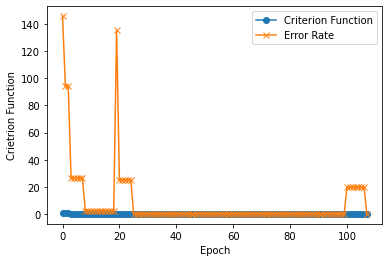

Test Accuracy =  100.0
Test Error Rate =  0.0


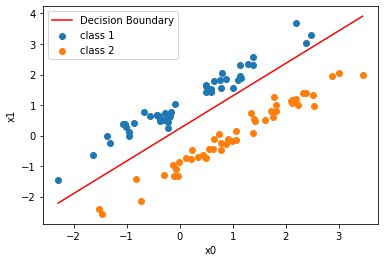

In [ ]:
dataset_test_np = np.array(dataset_test)
dataset_train_np = np.array(dataset_train)

dataset1_train = dataset_train_np[:, [2,0,1]]
dataset1_test = dataset_test_np[:,[2,0,1]]

P1 = preceptron(dataset1_train,dataset1_test,seed=1234)
opt, jw_vals, err_vals = P1.algo_sequential()
opt_1, jw_vals_1, err_vals_1 = P1.algo_sequential_1()
P1.lc_plot(jw_vals,err_vals)
P1.predict(opt)
P1.Db(opt)

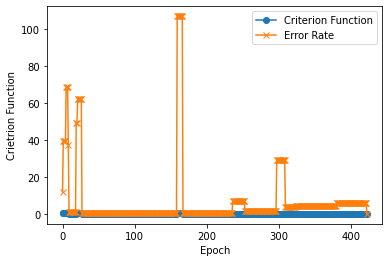

Test Accuracy =  100.0
Test Error Rate =  0.0


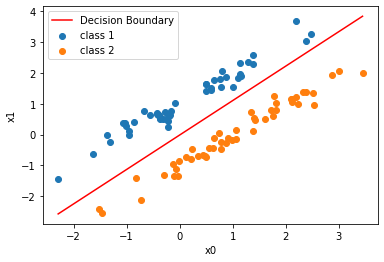

In [ ]:
P1.lc_plot(jw_vals_1,err_vals_1)
P1.predict(opt_1)
P1.Db(opt_1)


Zn=-1 multiplied to class2 points
Data is lineraly seperable
Zn=-1 multiplied to class2 points
Data is lineraly seperable


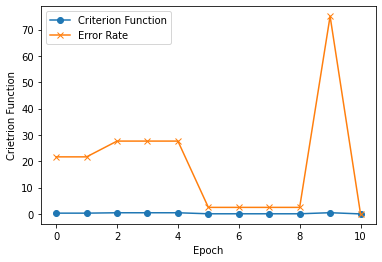

Test Accuracy =  98.0
Test Error Rate =  2.0


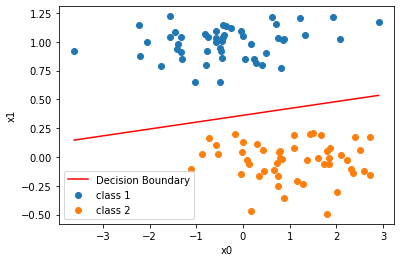

In [ ]:
dataset_test_np = np.array(df4)
dataset_train_np = np.array(df3)

dataset1_train = dataset_train_np[:, [2,0,1]]
dataset1_test = dataset_test_np[:,[2,0,1]]
P2 = preceptron(dataset1_train,dataset1_test,seed=12504)
opt, jw_vals, err_vals = P2.algo_sequential()
opt_2, jw_vals_2, err_vals_2 = P2.algo_sequential_1()
P2.lc_plot(jw_vals,err_vals)
P2.predict(opt)
P2.Db(opt)

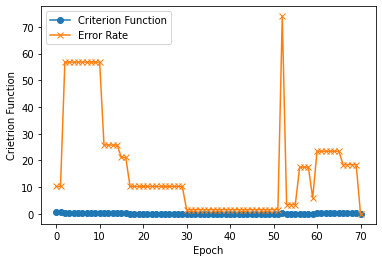

Test Accuracy =  97.0
Test Error Rate =  3.0


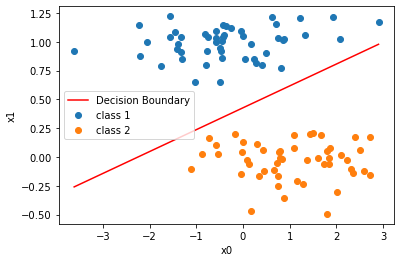

In [ ]:
P2.lc_plot(jw_vals_2,err_vals_2)
P2.predict(opt_2)
P2.Db(opt_2)

Zn=-1 multiplied to class2 points
No Convergence
Zn=-1 multiplied to class2 points
No Convergence


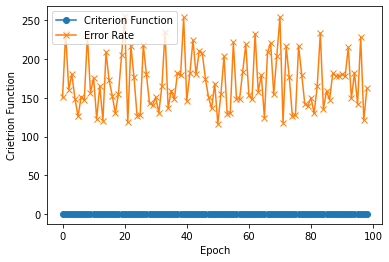

Test Accuracy =  49.0
Test Error Rate =  51.0


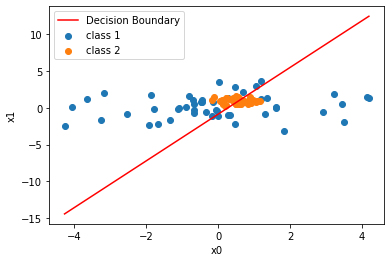

In [ ]:
dataset_test_np = np.array(df6)
dataset_train_np = np.array(df5)

dataset1_train = dataset_train_np[:, [2,0,1]]
dataset1_test = dataset_test_np[:,[2,0,1]]

P3 = preceptron(dataset1_train,dataset1_test,seed=1267)

opt, jw_vals, err_vals = P3.algo_sequential()
opt_3, jw_vals_3, err_vals_3 = P3.algo_sequential_1()

P3.lc_plot(jw_vals,err_vals)
P3.predict(opt)
P3.Db(opt)

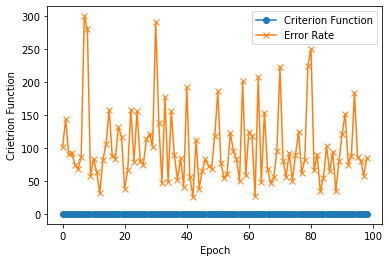

Test Accuracy =  43.0
Test Error Rate =  57.0


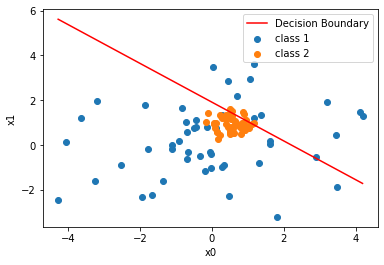

In [ ]:

P3.lc_plot(jw_vals_3,err_vals_3)
P3.predict(opt_3)
P3.Db(opt_3)

Zn=-1 multiplied to class2 points
No Convergence
Zn=-1 multiplied to class2 points
No Convergence


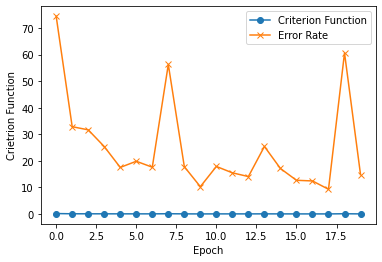

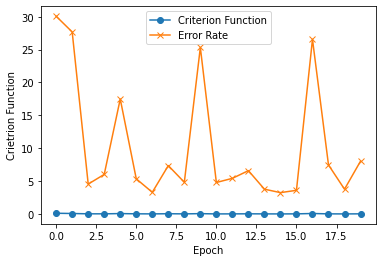

Test Accuracy =  43.82022471910113
Test Error Rate =  56.17977528089887
Test Accuracy =  39.325842696629216
Test Error Rate =  60.674157303370784


In [ ]:
from sklearn.preprocessing import normalize
df1[:,1:] = 100 * normalize(df1[:,1:], axis=0, norm='l1')
df2[:,1:] = 100 * normalize(df2[:,1:], axis=0, norm='l1')

P4 = preceptron(df1,df2,seed=1267)
opt, jw_vals, err_vals = P4.algo_sequential()
opt_4, jw_vals_4, err_vals_4 = P4.algo_sequential_1()
P4.lc_plot(jw_vals,err_vals)
P4.lc_plot(jw_vals_4,err_vals_4)

P4.predict(opt)
P4.predict(opt_4)

In [ ]:
train_x = df1[:,1:]
train_y = df1[:,0]

test_x = df2[:,1:]
test_y = df2[:,0]

train_x = np.column_stack((np.ones(df1.shape[0]),train_x))
test_x = np.column_stack((np.ones(df2.shape[0]),test_x))


In [ ]:

def _histograms(w):
    x = np.copy(train_x)
    y = np.copy(train_y)

    norm = np.linalg.norm(w)
    data = []
    c1 = []
    c2 = []

    for i,j in zip(x,y):
      value = np.dot(w.T,i)
      data.append(value/norm)
      if(j==1):
        c1.append(value/norm)
      else:
        c2.append(value/norm)

    plt.hist(data, label= "X Data")
    plt.hist(c1, label= "Malignent")
    plt.hist(c2, label = "Benign")
    plt.legend()
    plt.show()

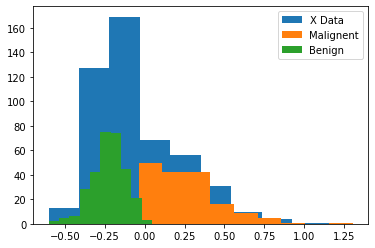

In [ ]:
_histograms(opt)

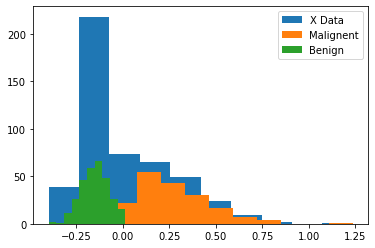

In [ ]:
_histograms(opt_4)